HOW MUCH RED PAINT DOES IT TAKE TO BE FUNNIER THAN SOUND?

In [1]:

#INITIATE PROJECT 
from module.core.Project import Project

project = Project('TCB2')
project

/Users/jasminebutler/Desktop/phd/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Project(name='TCB2')

In [2]:
#INSPECT DATA
from module.core import  HPLC
data = HPLC('TCB2').df
data
# data.regions.unique() 

,mouse_id,group_id,value,compound,region
0,2,1,86.863115,ASP,OF
1,5,1,74.158792,ASP,OF
2,7,1,124.972338,ASP,OF
3,8,4,146.541504,ASP,OF
4,9,1,179.331125,ASP,OF
...,...,...,...,...,...
891770,70,4,15.717876,5HT/DOPAC,HY
891771,70,4,5.529584,5HT/5HTP,HY
891772,70,4,2.925268,5HT/DA,HY
891773,70,4,1.859482,5HT/5HIAA,HY


In [ ]:
#INSPECT OUTLIERS

# data = Outliers('TCB2').df # Outlier_status : normal / suspected / kept / excluded
# data.select(outlier_status = 'suspected', compound='NA')

In [3]:
#INSPECT DATA
from module.core import Statistics, ProjectInformation, HPLC, Outliers, QuantitativeStatistic
from module.core.Constants import * #COMPOUNDS.list

statistic = QuantitativeStatistic.calculate(project="TCB2", experiment="agonist antagonist", compound="DA", region = 'MR').select(test = 'tukey').result
statistic

# stats = Statistics("TCB2") #result
# stats.select(fully_significant=True, compound=COMPOUND_CLASSES['monoamines'], experiment="agonist antagonist",  significant_pair=('3mg/kg TCB', 'TCB2+MDL'))
# stats.select(significant_pair=('0,3mg/kg TCB-2', 'vehicles'), compound=COMPOUND_CLASSES['monoamines'])
# stats.select (region = 'NAc', test = 'two_way_anova', experiment = 'agonist antagonist',compound='3MT/DA')




Preparing statistical groupings for agonist antagonist: 100%|██████████| 1/1 [00:00<00:00, 327.76it/s]
Calculating statistics: 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]


,group1,group2,meandiff,p-adj,lower,upper,reject
0,"0,2mg/kg MDL",3mg/kg TCB-2,-0.0226,0.2838,-0.0563,0.0111,False
1,"0,2mg/kg MDL",TCB-2 + MDL,-0.0369,0.0342,-0.0717,-0.0021,True
2,"0,2mg/kg MDL",vehicles,-0.0291,0.0960,-0.0619,0.0036,False
3,3mg/kg TCB-2,TCB-2 + MDL,-0.0143,0.7017,-0.0499,0.0214,False
4,3mg/kg TCB-2,vehicles,-0.0065,0.9529,-0.0402,0.0272,False
5,TCB-2 + MDL,vehicles,0.0078,0.9302,-0.0270,0.0425,False


In [4]:
#INSPECT PROJECT PRAMS
from module.core import Project, ExperimentInformation, TreatmentInformation, Palette

# data = TreatmentInformation('TCB2')
# data.select(label="vehicles")
# data.open()

Palette("TCB2").open()

# TCB2 to publish regions ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","A","dH","vH","NAc","VM","DM","VL","DL","MD","VPL","VPR","DLG","HY","SC","SN","VTA","DR","MR","CB"]
# TCB2 to excluded: IC , S1L6L, S1L6R

Created dose response experiment folder


Processing: 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]


SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/dose response/DA in ['PL', 'aCC', 'S1L', 'S1R', 'DLG', 'HY', 'SC', 'DR'].png
SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/dose response/DA in ['PL', 'aCC', 'S1L', 'S1R', 'DLG', 'HY', 'SC', 'DR'].svg


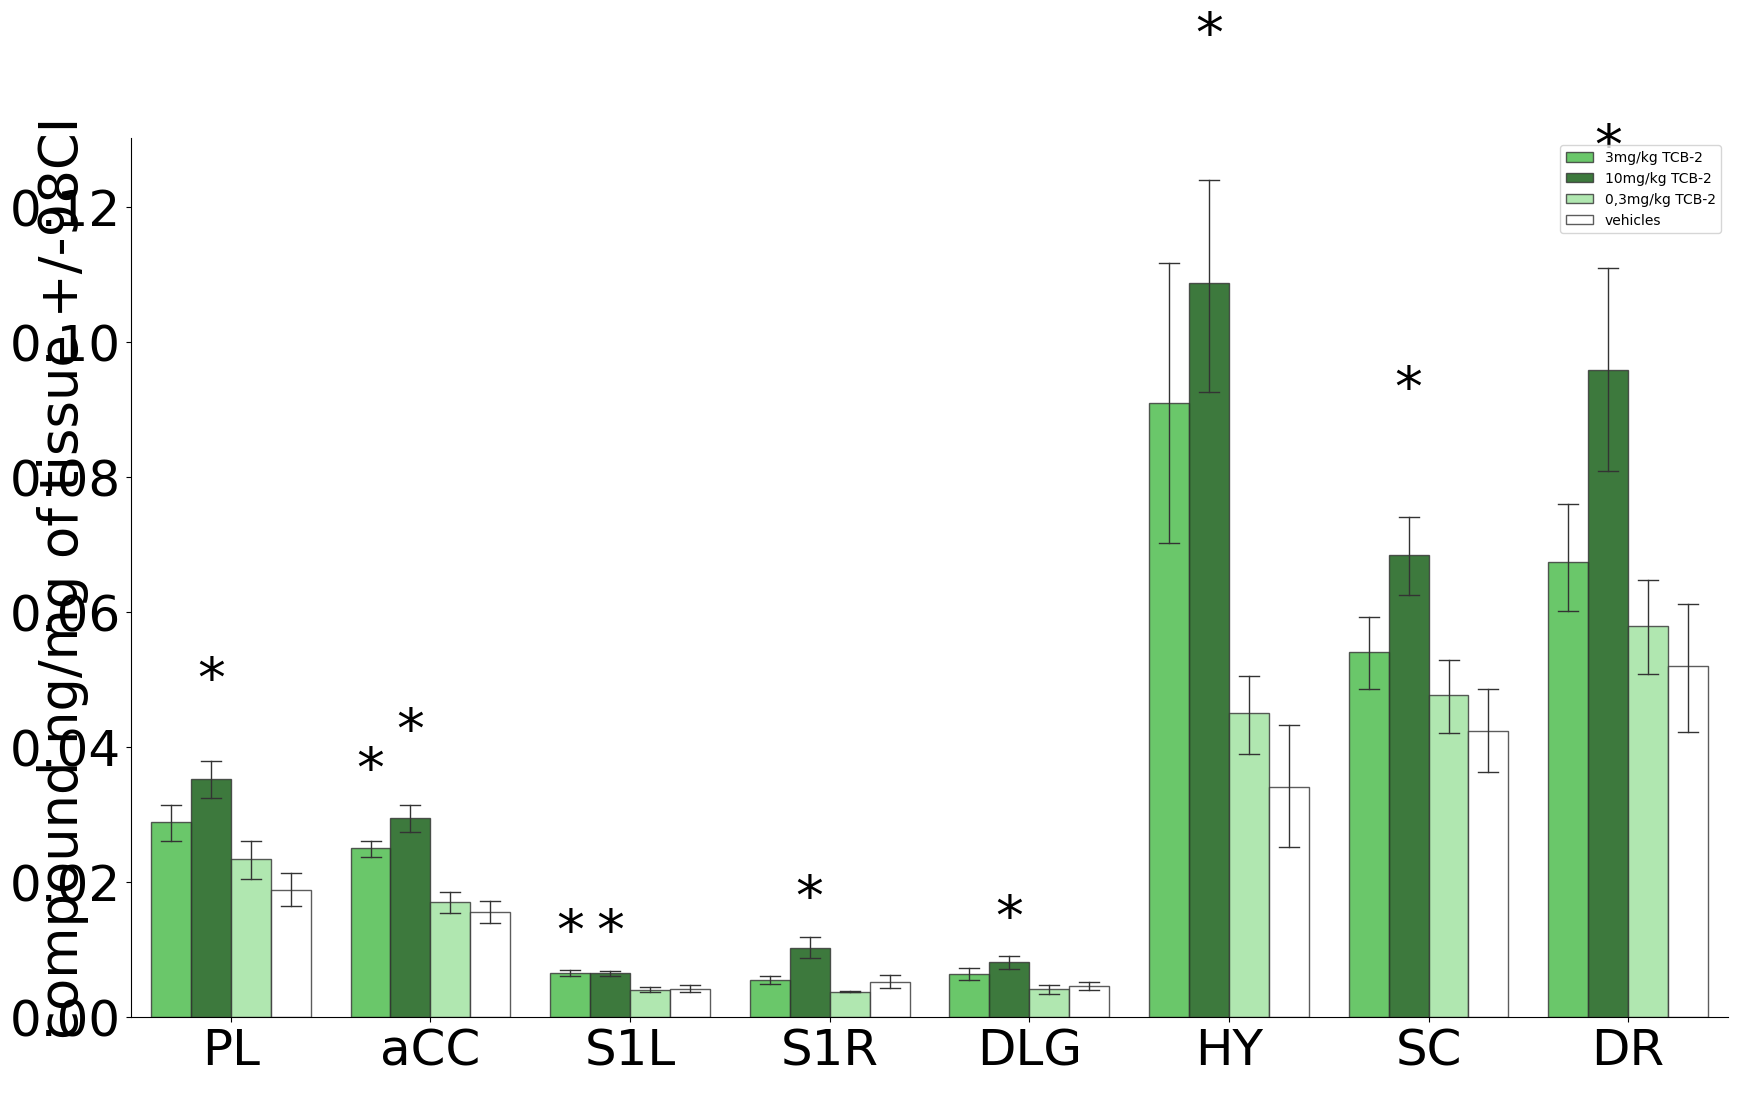

In [3]:
legit_regions = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","A","dH","vH","NAc","VM","DM","VL","DL","MD","VPL","VPR","DLG","HY","SC","SN","VTA","DR","MR","CB"]
high_DA = ['A','NAc', 'VM', 'DM', 'VL', 'DL', 'VTA']
low_DA = ["OF","PL","aCC","M1","SJ","S1L","S1R","AC","V1","dH","vH","MD","VPL","VPR","DLG","HY","SC","SN","DR","MR","CB"]



DA_high_sig = ['A','NAc', 'MD', 'HY'] #CROP 4 FIG / agg_antag ["NAc", "VM", "DM", "VL", "DL"]
DA_low_sig = ["PL","aCC","S1L","S1R","DLG","HY","SC","DR"] #  /   agg_antag ["PL", "aCC", "S1L", "MR"]
DOPAC_DA_sig = ["PL","aCC", "S1R","DM","DLG","CB"]
toiMT_DA_sig = ["NAc","VM","DM","VL","DL"]
HVA_DA_sig = ["dH", "HY", "SC","CB", "VTA"] #VTA sig two way agg antag 

NA_sig= ['aCC','vH', 'NAc','VPR','HY', 'SC', 'SN','VTA'] #VMA/NA in DLG add vH too for summary style / agg_ant ["aCC", "vH"]
VMA_NA_sig = ['DLG']

# "aCC" # ['5HT', 'DA', "NA", 'HVA'] # ["5HIAA/5HT", "5HT/5HTP", "DOPAC/DA"]

from module.core.Figure import Histogram
hist = Histogram('TCB2', 
                experiment='dose response', 
                compound=['DA'], 
                region= DA_low_sig, 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                # custom_params={"fig_width": 20},  # fixed fig with bar width vaires 
                # custom_params={"ylabel_x": -0.02},
                )

# Histogram('TCB2', experiment="dose response", compound="5HIAA/5HT", region=None, from_scratch=True, remove_outliers=True)
# Histogram('TCB2', compound="5HIAA/5HT", region=['CE'], from_scratch=True, handle_outliers=False)
# Histogram('TCB2', compound="5HIAA/5HT", region=['CE'], from_scratch=True)
# Histogram('TCB2', compound="5HIAA/5HT", from_scratch=True)

# hist.statistics.select( test = 'tukey').result

Processing: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]


SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/dose response/DA in ['aCC', 'OF', 'PL', 'M1'].png
SAVED /Users/jasminebutler/Desktop/phd/PROJECTS/TCB2/dose response/DA in ['aCC', 'OF', 'PL', 'M1'].svg


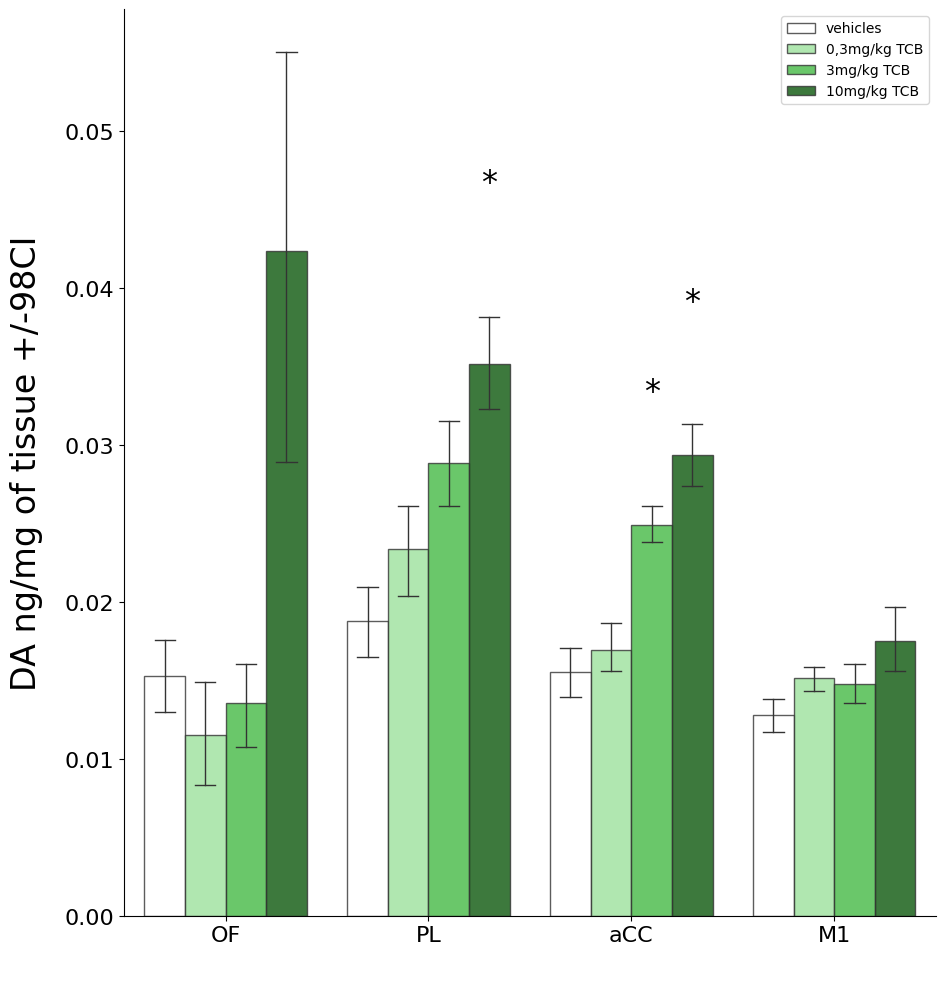

In [3]:
hist = Histogram('TCB2', 
                experiment='dose response', 
                compound="DA", 
                region= ["aCC", "OF", "PL", "M1"], 
                from_scratch=True, 
                remove_outliers='calculated', # calculated / eliminated / False
                # custom_params={"ylabel_x": -0.1}
                )


In [4]:
hist.statistics#.select(region='OF')


,p_value,is_significant,result,test,p_value_threshold
0,0.372,False,Source SS DF MS F p-u...,two_way_anova,0.05
1,0.024144,True,F p_value 0 3.514961 0.024144,one_way_anova,0.05
2,"[[(TCB-2 + MDL, vehicles)], [0.0254]]",True,group1 group2 meandiff p-ad...,tukey,0.05
